In [1]:
#Importamos nuestras librerias básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Creamos una lista de tamaño de 3221 y 2721, esto por un problema que al momento de cargar los archivos, la primera fila se tomaba como columna
#De esta forma se corrigio

lista1=range(3221)
lista1=list(lista1)

lista2=range(2721)
listaGen=list(lista2)

In [3]:
df1=pd.read_csv('sims_All_Genomes_13V_0_536.txt',engine='python',header=None,names=lista1)
df2=pd.read_csv('sims_All_Genomes_13V_500_800.txt',engine='python',header=None,names=listaGen)
df3=pd.read_csv('sims_All_Genomes_13V_800_1300.txt',engine='python',header=None,names=listaGen)
df4=pd.read_csv('sims_All_Genomes_13V_1300_2000.txt',engine='python',header=None,names=listaGen)
df5=pd.read_csv('sims_All_Genomes_13V_2000_2350.txt',engine='python',header=None,names=listaGen)
df6=pd.read_csv('sims_All_Genomes_13V_2350_3222.txt',engine='python',header=None,names=listaGen)

In [4]:
#Al momento de concatenar los archivos nos daba una matriz mayor a 3222 por lo tanto debemos eliminar tales "duplicados" poder obtener una matriz de 3221x3221
df1=df1.drop(range(500,536))
df2=df2.drop(range(300,323))
df3=df3.drop(range(500,509))
df4=df4.drop(range(700,740))
df5=df5.drop(range(350,395))

In [5]:
#Concatenamos todos los archivos
concatenado=pd.concat([df1,df2,df3,df4,df5,df6])
concatenado

,0,1,2,3,4,5,6,7,8,9,...,3211,3212,3213,3214,3215,3216,3217,3218,3219,3220
0,0.000016,0.000004,1.820420e-05,0.000016,0.000005,0.004489,0.000007,0.438905,0.444450,0.450203,...,0.447905,0.448444,0.447949,0.447964,0.448927,0.445895,0.453676,0.467578,0.434754,0.44857
1,0.000012,0.000002,4.023710e-07,0.000011,0.004468,0.000009,0.439023,0.444455,0.450205,0.443552,...,0.448449,0.447953,0.447968,0.448931,0.445902,0.453681,0.467579,0.434756,0.448574,NaN
2,0.000014,0.000012,1.062600e-06,0.004487,0.000003,0.438955,0.444464,0.450212,0.443550,0.443086,...,0.447953,0.447968,0.448927,0.445901,0.453679,0.467579,0.434764,0.448575,NaN,NaN
3,0.000001,0.000013,4.466020e-03,0.000011,0.439023,0.444456,0.450205,0.443553,0.443085,0.415969,...,0.447968,0.448931,0.445902,0.453682,0.467579,0.434756,0.448574,NaN,NaN,NaN
4,0.000012,0.004468,9.534000e-06,0.439023,0.444455,0.450205,0.443551,0.443084,0.415967,0.449071,...,0.448931,0.445902,0.453681,0.467579,0.434756,0.448574,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,0.408373,0.425185,4.082080e-01,0.430965,0.186768,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
867,0.423528,0.406570,4.278330e-01,0.414146,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
868,0.425409,0.433879,4.172700e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
869,0.464967,0.400860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Aqui el reto es que el profesor pidio que se hiciera como una matriz de 3222x3222 por tanto debemos crear una fila y columna a la matriz
fila=[]
fila.append(None)
concatenado= concatenado.append(fila,ignore_index=True)
concatenado['3221']=np.nan

In [7]:
#Una vez creada la fila y columna, de alguna manera debemos llenar los espacios vacíos por tanto creamos un bucle que nos  llene la diagonal de la matriz con 1
for i in range(0,3222):
  concatenado.iat[i,3221-i]=1
concatenado

,0,1,2,3,4,5,6,7,8,9,...,3212,3213,3214,3215,3216,3217,3218,3219,3220,3221
0,0.000016,0.000004,1.820420e-05,0.000016,0.000005,0.004489,0.000007,0.438905,0.444450,0.450203,...,0.448444,0.447949,0.447964,0.448927,0.445895,0.453676,0.467578,0.434754,0.44857,1.0
1,0.000012,0.000002,4.023710e-07,0.000011,0.004468,0.000009,0.439023,0.444455,0.450205,0.443552,...,0.447953,0.447968,0.448931,0.445902,0.453681,0.467579,0.434756,0.448574,1.00000,NaN
2,0.000014,0.000012,1.062600e-06,0.004487,0.000003,0.438955,0.444464,0.450212,0.443550,0.443086,...,0.447968,0.448927,0.445901,0.453679,0.467579,0.434764,0.448575,1.000000,NaN,NaN
3,0.000001,0.000013,4.466020e-03,0.000011,0.439023,0.444456,0.450205,0.443553,0.443085,0.415969,...,0.448931,0.445902,0.453682,0.467579,0.434756,0.448574,1.000000,NaN,NaN,NaN
4,0.000012,0.004468,9.534000e-06,0.439023,0.444455,0.450205,0.443551,0.443084,0.415967,0.449071,...,0.445902,0.453681,0.467579,0.434756,0.448574,1.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,0.423528,0.406570,4.278330e-01,0.414146,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3218,0.425409,0.433879,4.172700e-01,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3219,0.464967,0.400860,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3220,0.433332,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Debemos invertir la matriz para que nos quede de manera ordenada la matriz utilizando el siguiente bucle
matrizDiag=concatenado.copy()
for i in range(3222):
  for j in range(3222):
    matrizDiag.iat[i,j]=concatenado.iat[i,3221-j]

matrizDiag

,0,1,2,3,4,5,6,7,8,9,...,3212,3213,3214,3215,3216,3217,3218,3219,3220,3221
0,1.0,0.44857,0.434754,0.467578,0.453676,0.445895,0.448927,0.447964,0.447949,0.448444,...,0.450203,0.444450,0.438905,0.000007,0.004489,0.000005,0.000016,1.820420e-05,0.000004,0.000016
1,NaN,1.00000,0.448574,0.434756,0.467579,0.453681,0.445902,0.448931,0.447968,0.447953,...,0.443552,0.450205,0.444455,0.439023,0.000009,0.004468,0.000011,4.023710e-07,0.000002,0.000012
2,NaN,NaN,1.000000,0.448575,0.434764,0.467579,0.453679,0.445901,0.448927,0.447968,...,0.443086,0.443550,0.450212,0.444464,0.438955,0.000003,0.004487,1.062600e-06,0.000012,0.000014
3,NaN,NaN,NaN,1.000000,0.448574,0.434756,0.467579,0.453682,0.445902,0.448931,...,0.415969,0.443085,0.443553,0.450205,0.444456,0.439023,0.000011,4.466020e-03,0.000013,0.000001
4,NaN,NaN,NaN,NaN,1.000000,0.448574,0.434756,0.467579,0.453681,0.445902,...,0.449071,0.415967,0.443084,0.443551,0.450205,0.444455,0.439023,9.534000e-06,0.004468,0.000012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,0.414146,4.278330e-01,0.406570,0.423528
3218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,4.172700e-01,0.433879,0.425409
3219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,0.400860,0.464967
3220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.433332


In [9]:
#Ahora para llenar la parte inferior de la matriz creamos el siguiente ciclo for

matrizDiagT=matrizDiag.transpose()
matrizDiag_copy=matrizDiag.copy()
for i in range(0,3222):
  for j in range(0,i):
    matrizDiag_copy.iat[i,j] = matrizDiagT.iat[i,j]

matrizDiag_copy

,0,1,2,3,4,5,6,7,8,9,...,3212,3213,3214,3215,3216,3217,3218,3219,3220,3221
0,1.000000,4.485700e-01,0.434754,0.467578,0.453676,0.445895,0.448927,0.447964,0.447949,0.448444,...,0.450203,0.444450,0.438905,0.000007,0.004489,0.000005,0.000016,1.820420e-05,0.000004,0.000016
1,0.448570,1.000000e+00,0.448574,0.434756,0.467579,0.453681,0.445902,0.448931,0.447968,0.447953,...,0.443552,0.450205,0.444455,0.439023,0.000009,0.004468,0.000011,4.023710e-07,0.000002,0.000012
2,0.434754,4.485740e-01,1.000000,0.448575,0.434764,0.467579,0.453679,0.445901,0.448927,0.447968,...,0.443086,0.443550,0.450212,0.444464,0.438955,0.000003,0.004487,1.062600e-06,0.000012,0.000014
3,0.467578,4.347560e-01,0.448575,1.000000,0.448574,0.434756,0.467579,0.453682,0.445902,0.448931,...,0.415969,0.443085,0.443553,0.450205,0.444456,0.439023,0.000011,4.466020e-03,0.000013,0.000001
4,0.453676,4.675790e-01,0.434764,0.448574,1.000000,0.448574,0.434756,0.467579,0.453681,0.445902,...,0.449071,0.415967,0.443084,0.443551,0.450205,0.444455,0.439023,9.534000e-06,0.004468,0.000012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,0.000005,4.468280e-03,0.000003,0.439023,0.444455,0.450220,0.444144,0.443100,0.412842,0.404495,...,0.414789,0.421303,0.400933,0.432614,0.186768,1.000000,0.414146,4.278330e-01,0.406570,0.423528
3218,0.000016,1.116220e-05,0.004487,0.000011,0.439023,0.444469,0.450805,0.443565,0.390429,0.420374,...,0.409890,0.415163,0.420574,0.401034,0.430965,0.414146,1.000000,4.172700e-01,0.433879,0.425409
3219,0.000018,4.023710e-07,0.000001,0.004466,0.000010,0.438962,0.445161,0.450218,0.391770,0.405413,...,0.007877,0.410286,0.414791,0.420607,0.408208,0.427833,0.417270,1.000000e+00,0.400860,0.464967
3220,0.000004,1.932330e-06,0.000012,0.000013,0.004468,0.000001,0.439978,0.444468,0.395395,0.405928,...,0.007734,0.011651,0.409990,0.414799,0.425185,0.406570,0.433879,4.008600e-01,1.000000,0.433332


In [10]:
#Obtenemos los estadísticos descriptivos de la matriz
#Aclaración: Nos saltamos la parte de normalizar los datos ya que como tal ya estan normalizadas en el mismo rango de valores
matrizDiag_copy.describe()

,0,1,2,3,4,5,6,7,8,9,...,3212,3213,3214,3215,3216,3217,3218,3219,3220,3221
count,3222.000000,3.222000e+03,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,...,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3.222000e+03,3222.000000,3222.000000
mean,0.457448,4.575897e-01,0.457728,0.457870,0.458010,0.458157,0.458776,0.458434,0.453422,0.453944,...,0.367589,0.367170,0.363917,0.359086,0.354704,0.349653,0.344584,3.376356e-01,0.327473,0.310538
std,0.029228,2.809421e-02,0.026914,0.025678,0.024378,0.023000,0.021560,0.019998,0.039517,0.038001,...,0.123661,0.121904,0.123602,0.126446,0.129099,0.131269,0.134528,1.365925e-01,0.142136,0.151731
min,0.000004,4.023710e-07,0.000001,0.000001,0.000010,0.000001,0.004493,0.113898,0.190203,0.000025,...,0.000013,0.000024,0.000025,0.000007,0.000003,0.000003,0.000011,4.023710e-07,0.000001,0.000000
25%,0.447495,4.475088e-01,0.447521,0.447544,0.447550,0.447561,0.447919,0.447571,0.423498,0.428478,...,0.316463,0.315943,0.312912,0.307625,0.302304,0.295162,0.287201,2.783182e-01,0.260632,0.217735
50%,0.461730,4.617275e-01,0.461738,0.461737,0.461734,0.461746,0.462147,0.461747,0.467452,0.463807,...,0.414778,0.412736,0.409048,0.406662,0.404863,0.400563,0.398568,3.918795e-01,0.384854,0.375040
75%,0.470383,4.703885e-01,0.470386,0.470387,0.470386,0.470390,0.470977,0.470389,0.486979,0.483657,...,0.449875,0.448302,0.446763,0.444080,0.441597,0.438943,0.436962,4.346605e-01,0.432255,0.427136
max,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000


In [ ]:
#Ahora podemos proceder a buscar la cantidad optima de cluster utilizando el método de Elbow, el cual
#Consiste en buscar puntos de quiebre en el número de cluster y se supondra que esa sera la cantidad optima

from sklearn.cluster import KMeans #Importamos la libreria
wcss=[]
#Utilizamos bucle for para que busque el más optimo en un rango de 72 clusters, asi vaya revisando cada una
for i in range(1,73):
  kmeans=KMeans(n_clusters=i, max_iter=300)
  kmeans.fit(matrizDiag_copy)
  wcss.append(kmeans.inertia_)

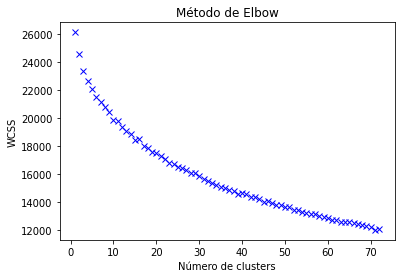

In [12]:
#Graficamos todos los datos obtenido con el método de elbow
plt.plot(range(1,73),wcss,'bx')
plt.title('Método de Elbow')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
#Posteriormente, notamos que antes del cluster número 15 hay un un punto de quiebre notable

#Una vez encontrado el número de cluster optimo, comenzamos a aplicar el KMeans

clustering= KMeans(n_clusters=15, max_iter=300)
clustering.fit(matrizDiag_copy)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



KMeans(n_clusters=15)

In [51]:
#Agregaremos la clasificación de los cluster a los datos para saber cual cluster tiene cada uno de las filas de datos
matrizDiag_copy['Clusters']=clustering.labels_
matrizDiag_copy.head(3222)

,0,1,2,3,4,5,6,7,8,9,...,3213,3214,3215,3216,3217,3218,3219,3220,3221,Clusters
0,1.000000,4.485700e-01,0.434754,0.467578,0.453676,0.445895,0.448927,0.447964,0.447949,0.448444,...,0.444450,0.438905,0.000007,0.004489,0.000005,0.000016,1.820420e-05,0.000004,0.000016,11
1,0.448570,1.000000e+00,0.448574,0.434756,0.467579,0.453681,0.445902,0.448931,0.447968,0.447953,...,0.450205,0.444455,0.439023,0.000009,0.004468,0.000011,4.023710e-07,0.000002,0.000012,11
2,0.434754,4.485740e-01,1.000000,0.448575,0.434764,0.467579,0.453679,0.445901,0.448927,0.447968,...,0.443550,0.450212,0.444464,0.438955,0.000003,0.004487,1.062600e-06,0.000012,0.000014,11
3,0.467578,4.347560e-01,0.448575,1.000000,0.448574,0.434756,0.467579,0.453682,0.445902,0.448931,...,0.443085,0.443553,0.450205,0.444456,0.439023,0.000011,4.466020e-03,0.000013,0.000001,11
4,0.453676,4.675790e-01,0.434764,0.448574,1.000000,0.448574,0.434756,0.467579,0.453681,0.445902,...,0.415967,0.443084,0.443551,0.450205,0.444455,0.439023,9.534000e-06,0.004468,0.000012,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,0.000005,4.468280e-03,0.000003,0.439023,0.444455,0.450220,0.444144,0.443100,0.412842,0.404495,...,0.421303,0.400933,0.432614,0.186768,1.000000,0.414146,4.278330e-01,0.406570,0.423528,3
3218,0.000016,1.116220e-05,0.004487,0.000011,0.439023,0.444469,0.450805,0.443565,0.390429,0.420374,...,0.415163,0.420574,0.401034,0.430965,0.414146,1.000000,4.172700e-01,0.433879,0.425409,3
3219,0.000018,4.023710e-07,0.000001,0.004466,0.000010,0.438962,0.445161,0.450218,0.391770,0.405413,...,0.410286,0.414791,0.420607,0.408208,0.427833,0.417270,1.000000e+00,0.400860,0.464967,3
3220,0.000004,1.932330e-06,0.000012,0.000013,0.004468,0.000001,0.439978,0.444468,0.395395,0.405928,...,0.011651,0.409990,0.414799,0.425185,0.406570,0.433879,4.008600e-01,1.000000,0.433332,3


In [52]:
#Se elimino el PCA ya que para efectos del ejercicio no tiene ninguna utilidad y ademas ya tenemos el uso de diagrama Sankey

In [53]:
#Cargamos las familias con el número de cluster
familias = pd.read_csv('groupOrderFamilySlop.txt', sep=',',names=(0,1,2))
familias

,0,1,2
0,Actinobacteria,Bifidobacteriales,76
1,Actinobacteria,Micrococcales,92
2,Actinobacteria,Streptomycetales,79
3,Actinobacteria,Micromonosporales,10
4,Actinobacteria,Pseudonocardiales,26
...,...,...,...
67,Thermotogales,Thermotogaceae,20
68,Thiotrichales,Piscirickettsiaceae,24
69,Thiotrichales,Francisellaceae,61
70,Vibrionales,Vibrionaceae,121


In [54]:
#Datos necesarios para graficar
source = pd.DataFrame(data = np.arange(0,15))
label = pd.DataFrame(data = familias[1])
value = pd.DataFrame(data = familias[2])
k_means = pd.DataFrame(data = np.zeros(15))
real_clusters=pd.DataFrame(data=np.arange(0,3222))

In [55]:
indice = 0 #Creamos un indice 
for i in range(15):#Bucleo para que llene la matriz de real_clusters con los datos de las familias para obtener el número real de clusters
  for n in range(familias.iat[i,2]):
    real_clusters.iat[indice,0] = familias.iat[i,1]
    indice = indice + 1
    contador = 0
for i in range(3222):#Bucle para que obtengamos el numero y num_anterior con los datos de real_cluster
  numero = real_clusters.iat[i,0]
  num_anterior = real_clusters.iat[i-1,0]
  if(numero != num_anterior):#Condición si numero es diferente o igual a num_anterior, este debe llenar num_clasi utilizando los datos de nuestra matriz original
    num_clasi = matrizDiag_copy.at[i,'Clusters']
    k_means.at[contador] = num_clasi
    contador = contador + 1

In [59]:
k_means = pd.DataFrame(data=k_means)#Convertimos en un dataframe
for i in range(15):#Bucle donde agregará los cluster optimo que se obtuvo en el método de elbow
  k_means.iat[i,0] = k_means.iat[i,0] + 15

In [60]:
node = dict(label = label[1], pad = 8, thickness=15)#nodo
link = dict(source = source[0], target = k_means[0], value = value[2])#enlance

In [62]:
#Utilizaremos la gráfica de sankey para la visualización de los datos finales obtenidos de las familias y bacterias
import plotly.graph_objects as go
plot = go.Figure(go.Sankey(
    node=node, 
    link=link))

plot.update_layout(height = 1300, 
                   width = 1300,
                   font = dict(size=15,color='black'), 
                   title = 'Diagrama de Sankey sobre las familias y bacterias utilizando 15 clusters', 
                   font_size=12, 
                   paper_bgcolor='#fcfff0'
                   )
plot.show()


In [ ]:
#En base a la gráfica para poder interpretarla, en este caso el diagrama de sankey, es que mientras mayor sea la magnitud de las lineas
#sera mayor el flujo de bacterias que tiene esa familia, por lo tanto podemos observar que la familia Legionellaceae tiene una cantidad de 10 tipos de bacterias
#Donde en su totalidad hay 526 bacterias dentro de esa la familia de los Legionellaceae
#En conclusión la familia de los Legionellaceae es la mejor familia de bacterias.